# Простые модели машинного обучения в sklearn

<img src="supervised.png">
<img src="unsupervised.png">

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [3]:
sales = pd.read_csv('sales_train.csv')
sales59 = sales[sales.shop_id == 59]
sales59.date = pd.to_datetime(sales59.date, format='mixed')
sales59.set_index('date', inplace=True)
sales59 = sales59.drop(columns=['date_block_num', 'item_id'])
sales59['income'] = sales59['item_price']*sales59['item_cnt_day']

sales_59 = sales59[sales59.index.year == 2013]

sales_59 = sales_59[sales_59.index.month < 11]
sales_59_historic = sales_59[sales_59.index.month < 10]
sales_59_to_predict = sales_59[sales_59.index.month == 10]
sales_59_historic = sales_59_historic.sort_values(by = 'date')
sales_59_to_predict = sales_59_to_predict.sort_values(by = 'date')

sales_59_historic['INC'] = sales_59_historic.income.cumsum()


C:\Users\dboy\AppData\Local\Temp\ipykernel_14012\3997472281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales59.date = pd.to_datetime(sales59.date, format='mixed')


In [4]:
sales_59_historic['date'] = sales_59_historic.index

<Axes: xlabel='date', ylabel='INC'>

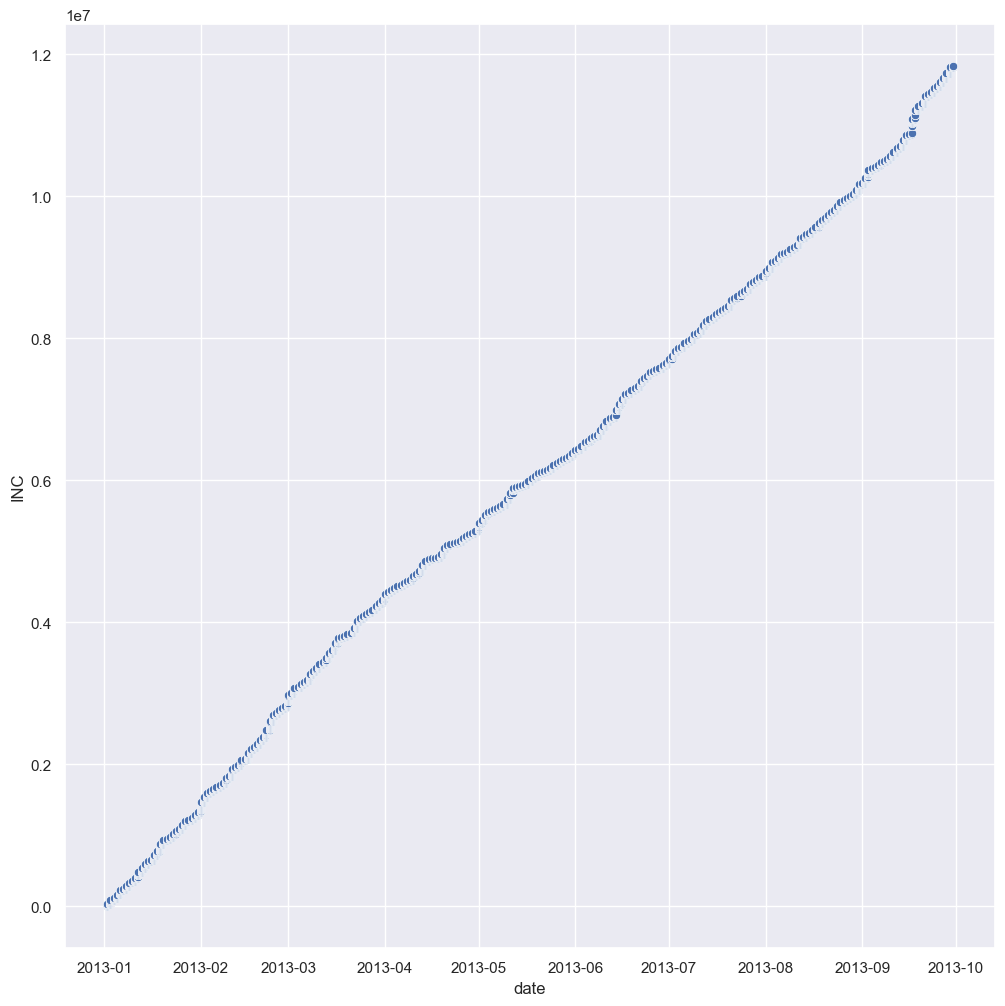

In [5]:
plt.figure(figsize = (12,12))
sns.scatterplot(data=sales_59_historic,x='date', y='INC')

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
LR = LinearRegression().fit(np.arange(272).reshape(-1, 1),sales_59_historic.INC.resample('1D').agg('last').values.reshape(-1, 1))

In [8]:
day = 272 + 31
prediction = LR.predict([[day]])

In [9]:
prediction

array([[12845517.37636714]])

Точно то же предсказание, что и в случае с scipy

## Построим теперь логистическую регрессию

In [12]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)

In [13]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
iris = pd.DataFrame({'f1' : X[:,0],
                     'f2' : X[:,1],
                     'f3' : X[:,2],
                     'f4' : X[:,3],
                     'target' : y})

C:\Users\dboy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dboy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dboy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dboy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

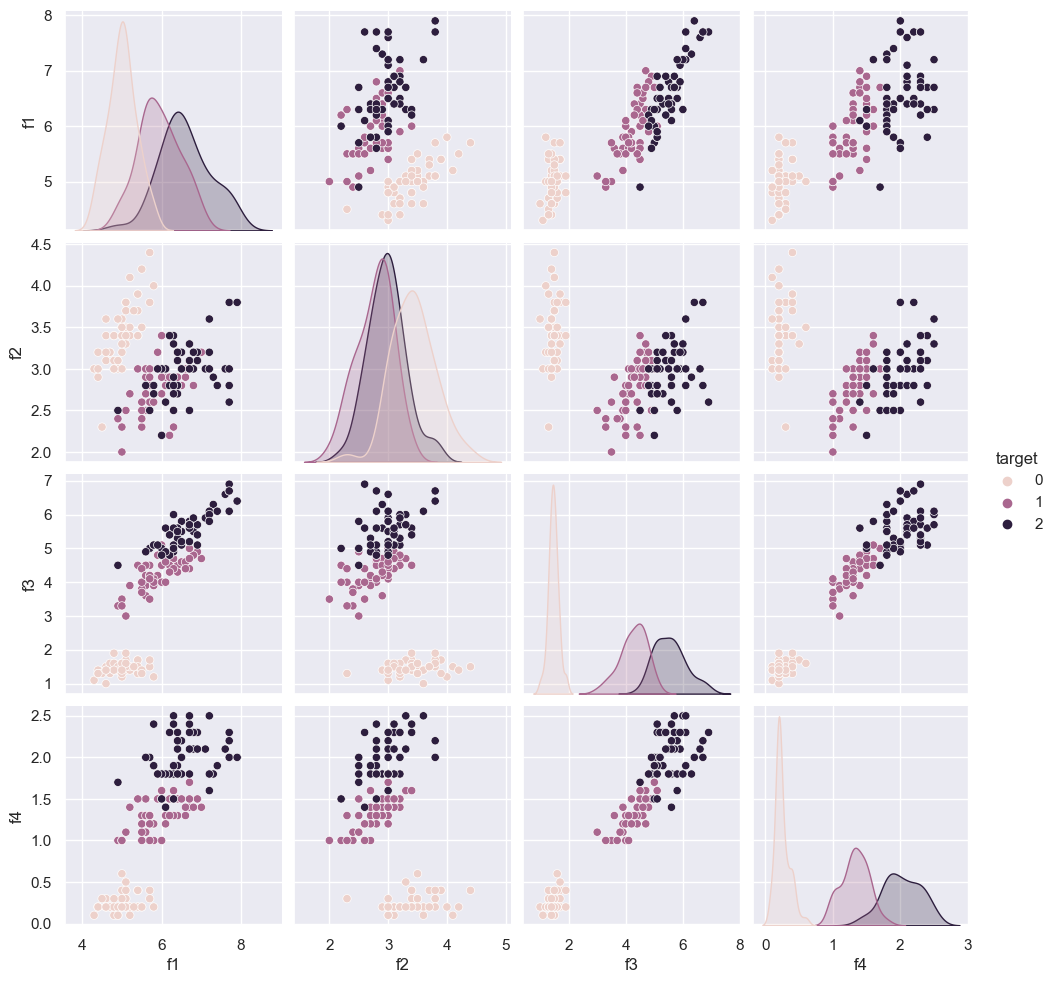

In [15]:
sns.pairplot(data=iris, hue='target')

In [16]:
lr = LogisticRegression().fit(X, y)

C:\Users\dboy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
lr.predict_proba(X)

array([[9.81799203e-01, 1.82007824e-02, 1.44272072e-08],
       [9.71729178e-01, 2.82707921e-02, 3.01668533e-08],
       [9.85446345e-01, 1.45536425e-02, 1.23270318e-08],
       [9.76285990e-01, 2.37139700e-02, 3.97262152e-08],
       [9.85382932e-01, 1.46170562e-02, 1.19455104e-08],
       [9.70459635e-01, 2.95402915e-02, 7.35327888e-08],
       [9.86881109e-01, 1.31188708e-02, 1.99819334e-08],
       [9.76397711e-01, 2.36022610e-02, 2.76325870e-08],
       [9.79834341e-01, 2.01656287e-02, 3.06905725e-08],
       [9.69133564e-01, 3.08664045e-02, 3.16507811e-08],
       [9.76508915e-01, 2.34910654e-02, 1.92205435e-08],
       [9.75398771e-01, 2.46011854e-02, 4.38583491e-08],
       [9.74560246e-01, 2.54397326e-02, 2.14865104e-08],
       [9.91969176e-01, 8.03081976e-03, 3.89517416e-09],
       [9.88210680e-01, 1.17893169e-02, 2.80747213e-09],
       [9.86772962e-01, 1.32270251e-02, 1.27908347e-08],
       [9.88116896e-01, 1.18830948e-02, 9.19928949e-09],
       [9.81554930e-01, 1.84450

C:\Users\dboy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

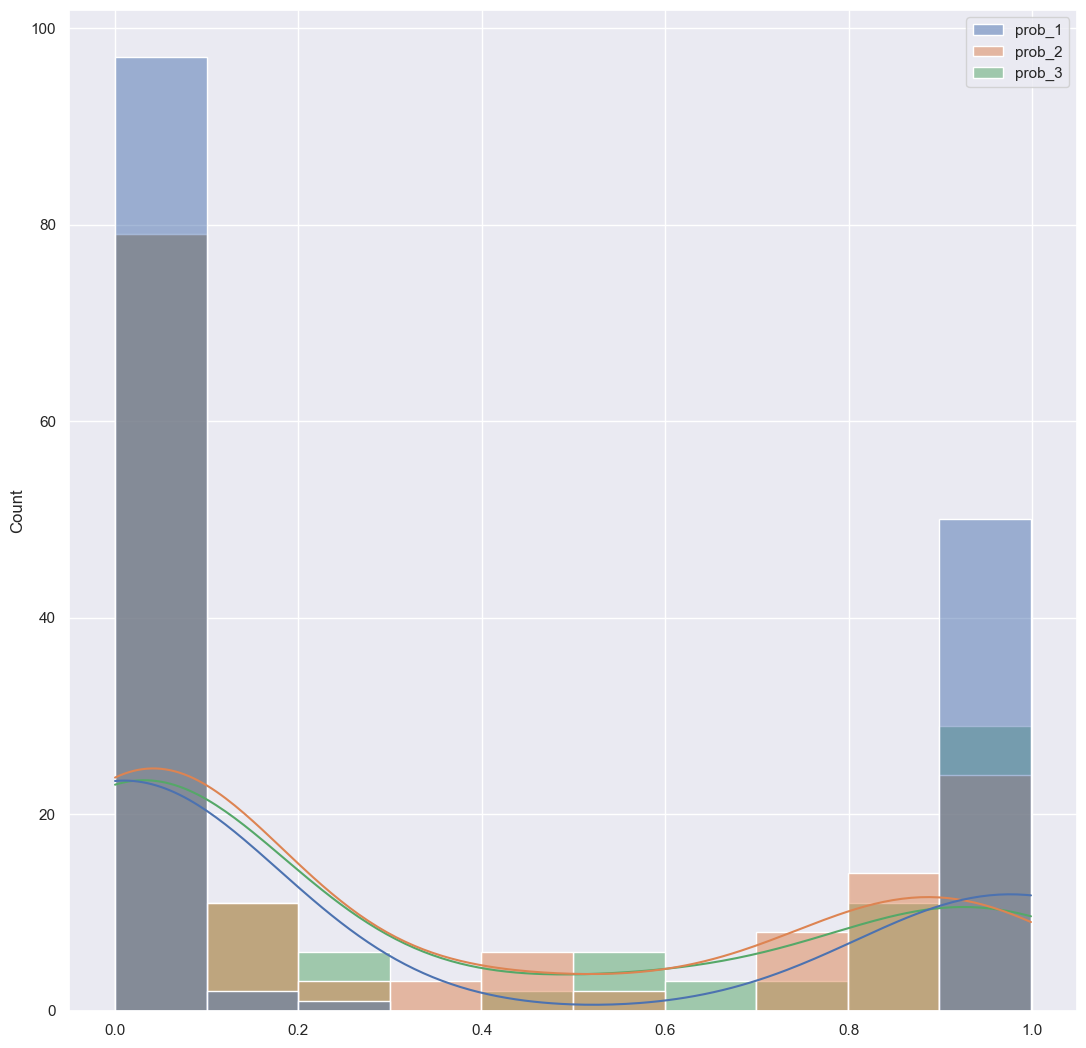

In [18]:
plt.figure(figsize=(13,13))

ans = lr.predict_proba(X)
sures = pd.DataFrame({'prob_1' : ans[:,0], 'prob_2' : ans[:,1], 'prob_3' : ans[:,2]})
sns.histplot(data=sures, kde=True)

C:\Users\dboy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

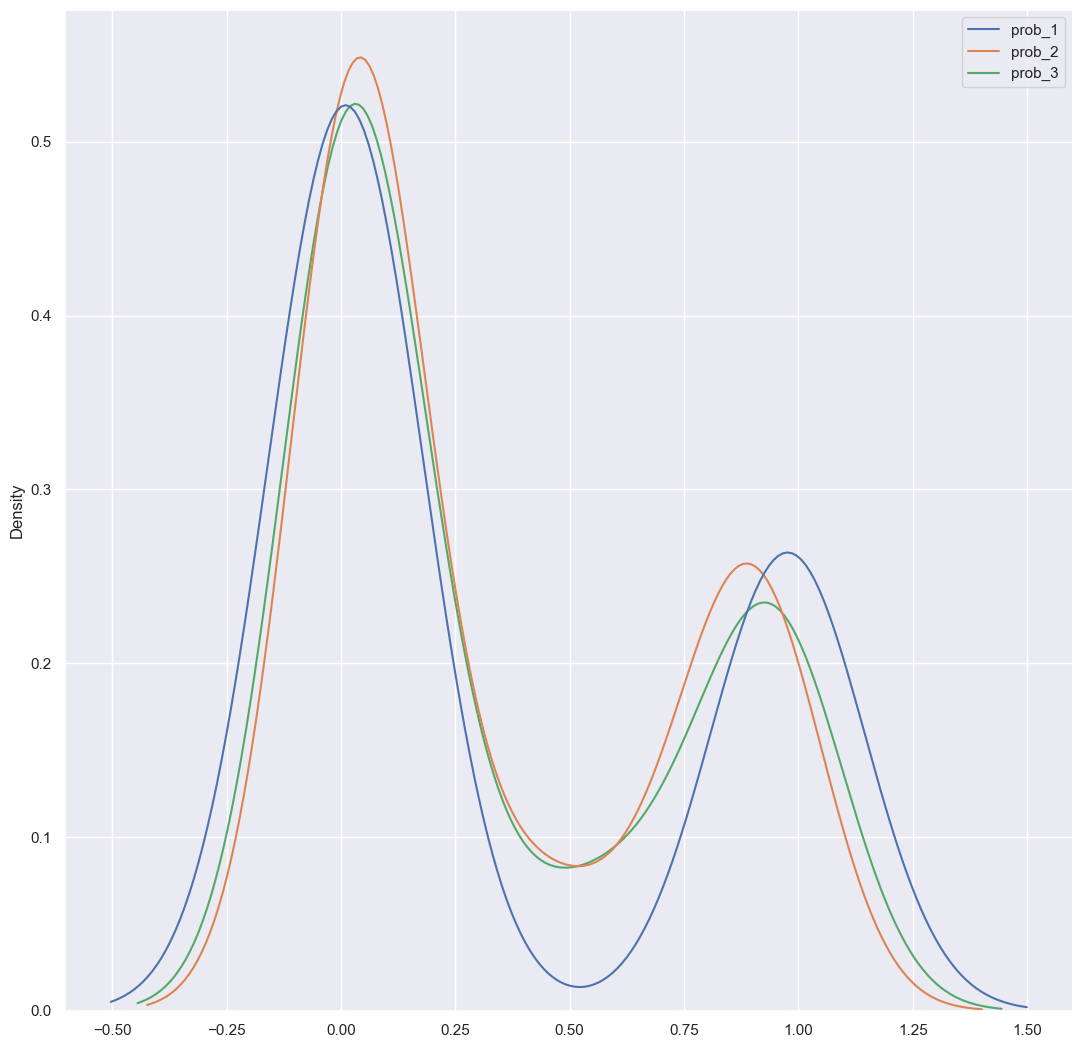

In [19]:
plt.figure(figsize=(13,13))
sns.kdeplot(data=sures)

## Решающие деревья

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

In [21]:
cross_val_score(clf, X, y, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [22]:
clf = DecisionTreeClassifier().fit(X,y)

In [23]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



## Decision Trees VS Linear Regression

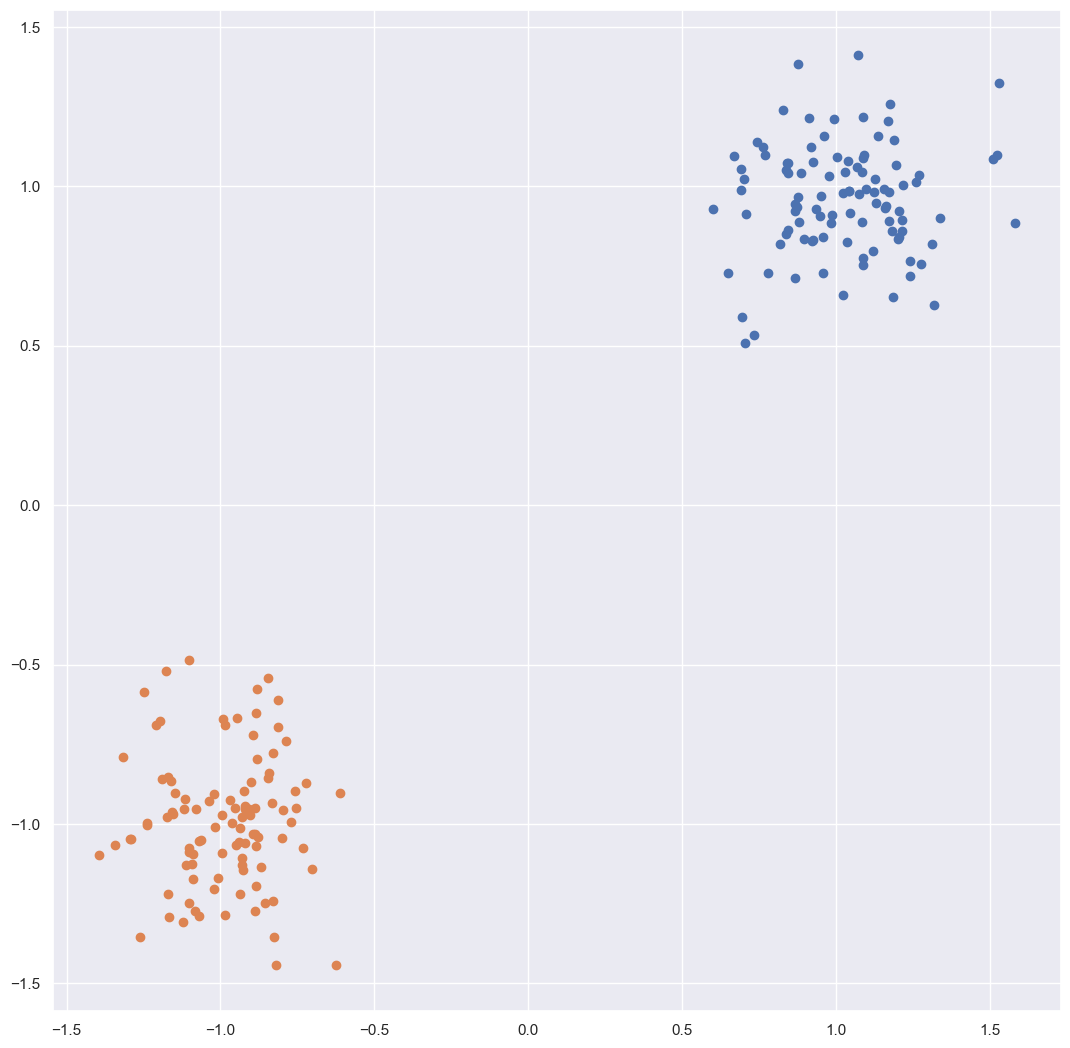

In [24]:
class_1 = np.random.randn(100,2)*0.2 + np.array([1.,1.])
class_2 = np.random.randn(100,2)*0.2 - np.array([1.,1.])

plt.figure(figsize=(13,13))
plt.scatter(class_1[:,0], class_1[:,1])
plt.scatter(class_2[:,0], class_2[:,1])

In [25]:
X = np.concatenate([class_1, class_2])
y = np.array([0 if i<100 else 1 for i in range(200)])

In [26]:
lr = LogisticRegression().fit(X, y)
clf = DecisionTreeClassifier().fit(X,y)

In [27]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.01
|   |--- class: 1
|--- feature_1 >  0.01
|   |--- class: 0



In [28]:
x_ = np.linspace([-2,-2],[2,2],100)
y_ = lr.coef_[0][0]*x_ + lr.coef_[0][1]

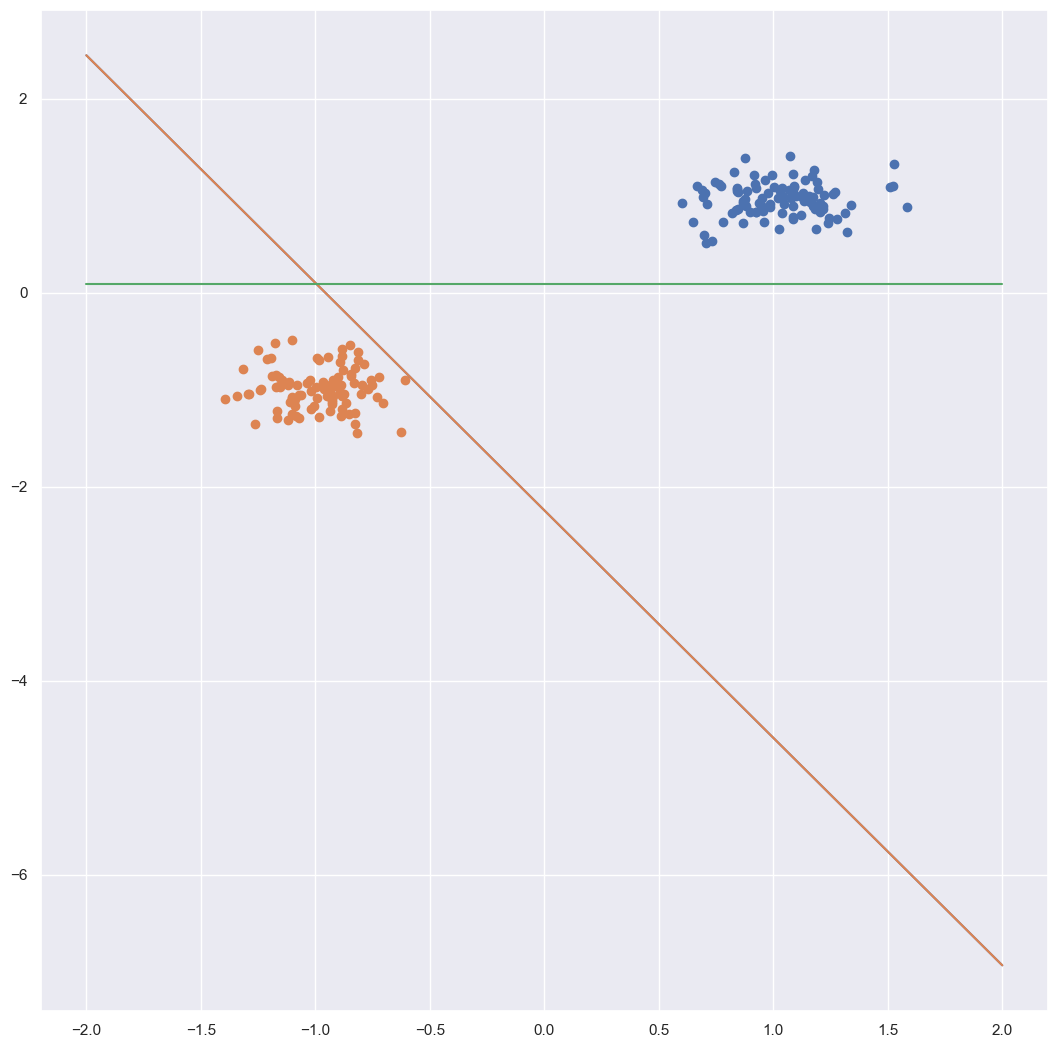

In [29]:
plt.figure(figsize=(13,13))
plt.scatter(class_1[:,0], class_1[:,1])
plt.scatter(class_2[:,0], class_2[:,1])
plt.plot(x_,y_)
plt.plot([-2., 2.], [0.09, 0.09])

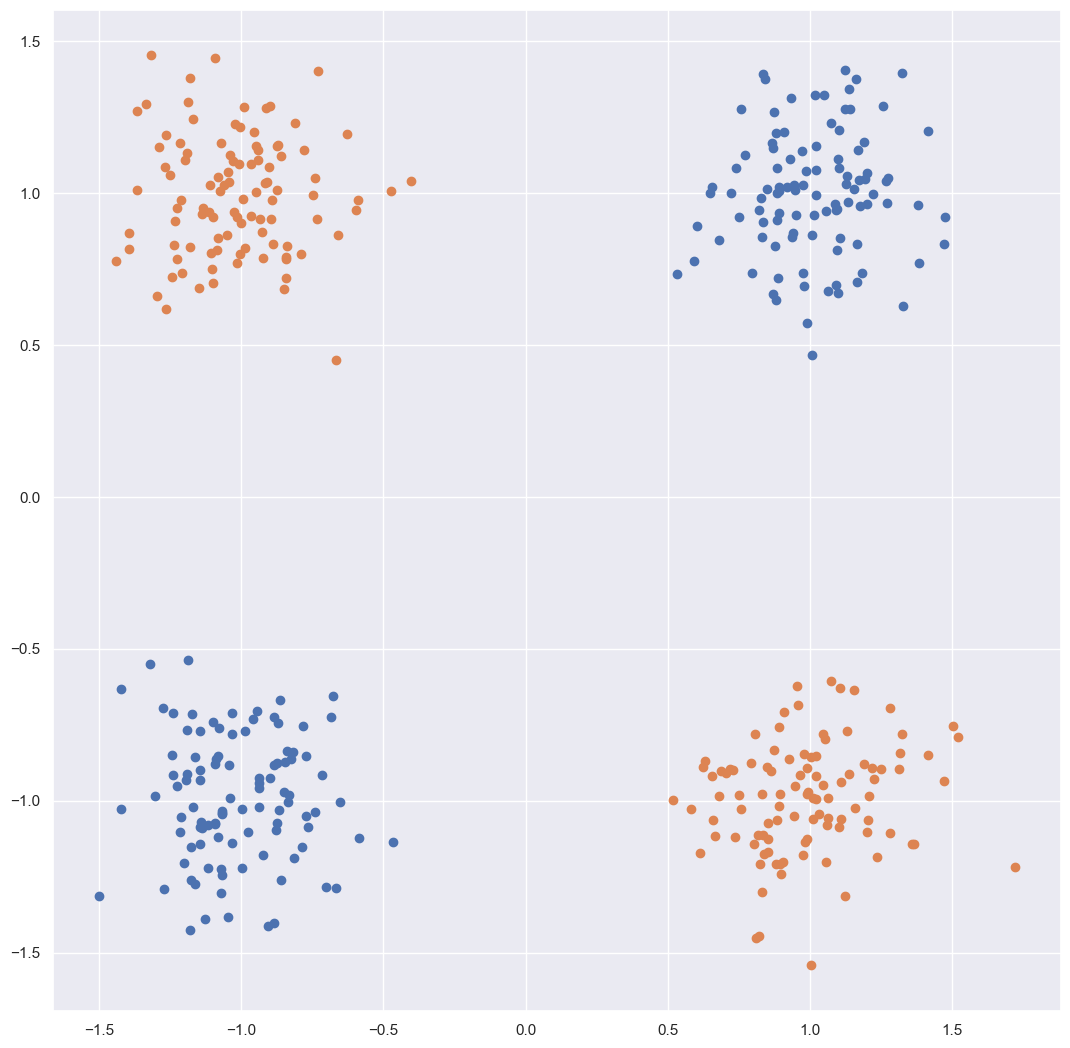

In [30]:
class_1 = np.concatenate([np.random.randn(100,2)*0.2 + np.array([-1.,-1.]), np.random.randn(100,2)*0.2 + np.array([1.,1.])])
class_2 = np.concatenate([np.random.randn(100,2)*0.2 + np.array([-1.,1.]), np.random.randn(100,2)*0.2 + np.array([1.,-1.])])


plt.figure(figsize=(13,13))
plt.scatter(class_1[:,0], class_1[:,1])
plt.scatter(class_2[:,0], class_2[:,1])

In [31]:
X = np.concatenate([class_1, class_2])
y = np.array([0 if i<200 else 1 for i in range(400)])

In [32]:
lr = LogisticRegression().fit(X, y)
clf = DecisionTreeClassifier().fit(X,y)

In [33]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= -1.22
|   |--- feature_0 <= 0.07
|   |   |--- class: 0
|   |--- feature_0 >  0.07
|   |   |--- class: 1
|--- feature_1 >  -1.22
|   |--- feature_0 <= 0.87
|   |   |--- feature_1 <= -0.04
|   |   |   |--- feature_0 <= 0.03
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  0.03
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  -0.04
|   |   |   |--- feature_0 <= 0.07
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.07
|   |   |   |   |--- class: 0
|   |--- feature_0 >  0.87
|   |   |--- feature_1 <= -0.07
|   |   |   |--- class: 1
|   |   |--- feature_1 >  -0.07
|   |   |   |--- class: 0



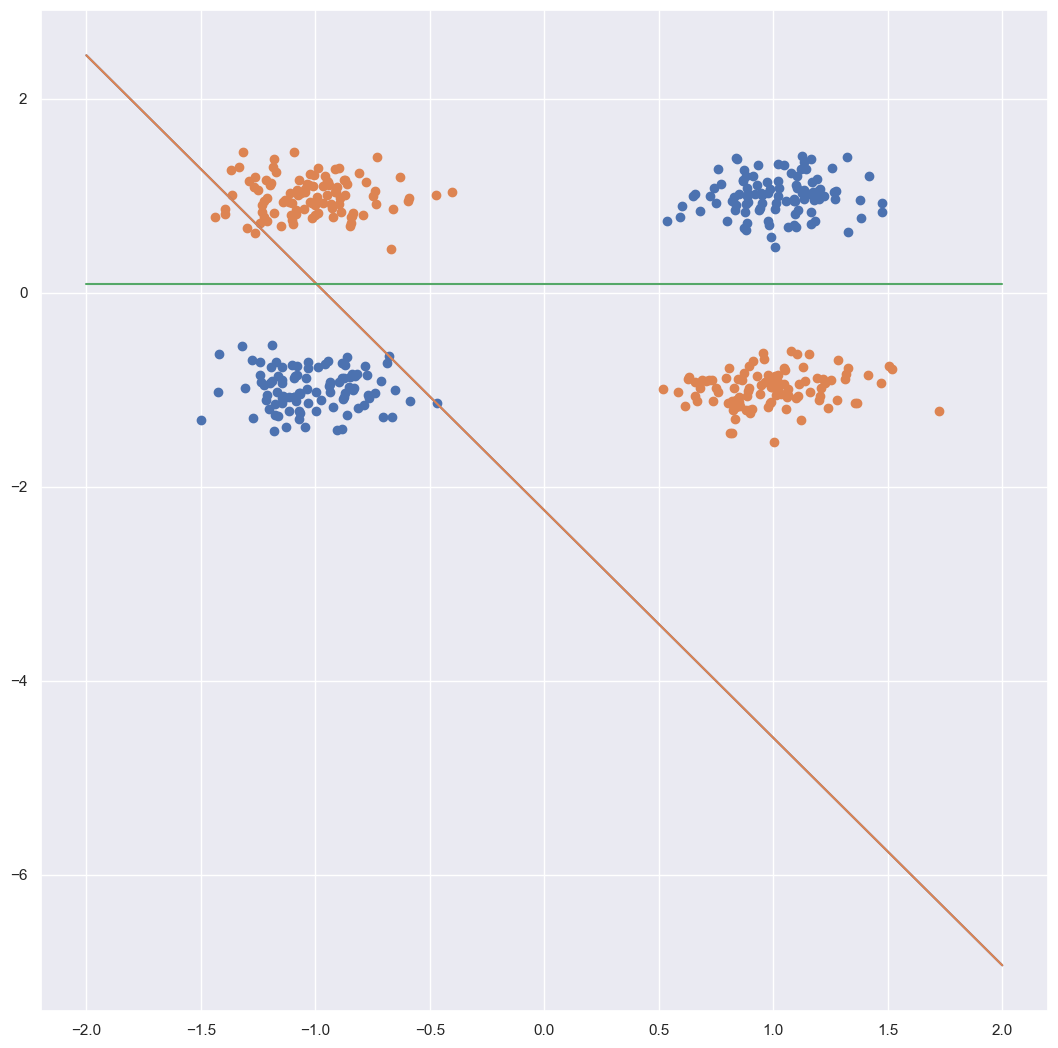

In [34]:
plt.figure(figsize=(13,13))
plt.scatter(class_1[:,0], class_1[:,1])
plt.scatter(class_2[:,0], class_2[:,1])
plt.plot(x_,y_)
plt.plot([-2., 2.], [0.09, 0.09])

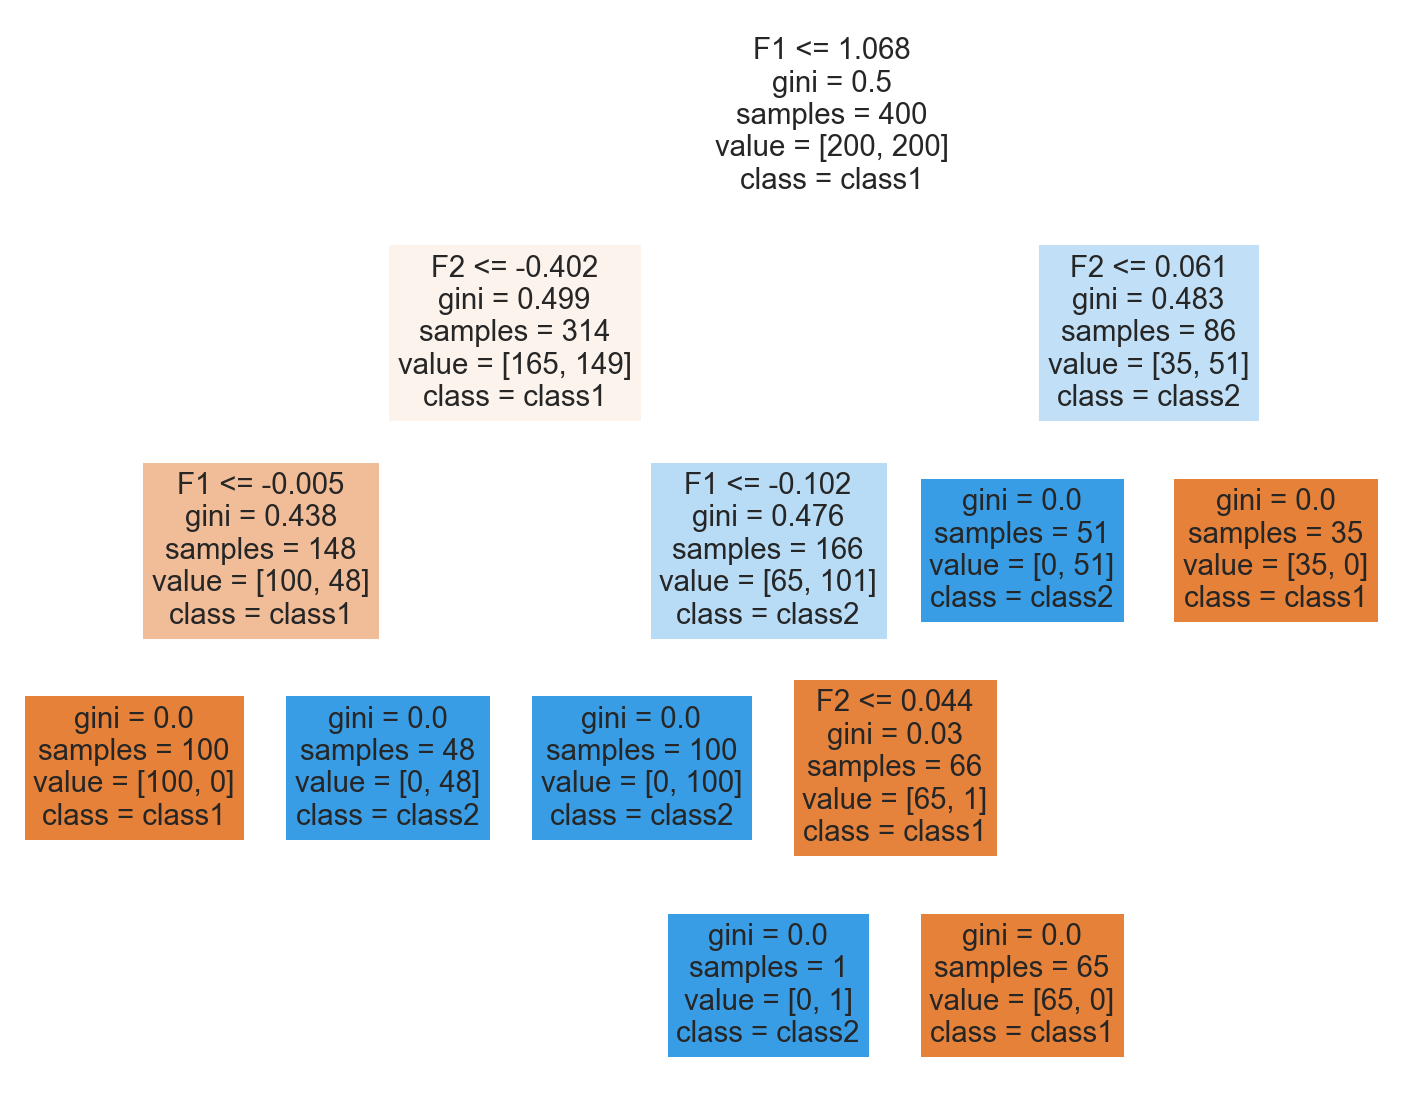

In [33]:
fig = plt.figure(figsize=(25,20))
plt.grid()
_ = tree.plot_tree(clf, 
                   feature_names=['F1', 'F2'],
                   class_names=['class1', 'class2'],
                   filled=True)